In [64]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import theano
import theano.tensor as T

In [140]:
ytrue = np.asarray([
        [0.25, 0.25, 0.5, 0.5, 1./6,1.,0.]
    ])

In [141]:
y = np.asarray([
        [0., 0., 0.5, 0.5, 0.1456, 0.87, 0.13]
    ])

In [142]:
ytrue = np.concatenate((ytrue,y),axis=0)
y = np.copy(ytrue)[::-1,:]

In [34]:
def iou_score(b1, b2):
    '''
    b1 = (x,y,width,height), same for others
    '''
    ci = (
        max(b1[0],b2[0]),
        max(b1[1],b2[1])
    )
    cf = (
        min(b1[0] + b1[2], b2[0] + b2[2]),
        min(b1[1] + b1[3], b2[1] + b2[3])
    )
    isec = (cf[0] - ci[0]) * (cf[1] - ci[1])
    union = np.prod(b1[2:]) + np.prod(b2[2:]) - 2 * isec
    return isec/union

In [91]:
iou_score(y[0,:4],ytrue[0,:4])

1.9838056680161944

In [124]:
def iou_score_T(b1, b2):
    xi = T.maximum(b1[:,0], b2[:,0])
    yi = T.maximum(b1[:,1], b2[:,1])
    xf = T.minimum(b1[:,0]+b1[:,2], b2[:,0]+b2[:,2])
    yf = T.minimum(b1[:,1]+b1[:,3], b2[:,1]+b2[:,3])
    isec = T.maximum((xf-xi)*(yf-yi), 0.)
    union = T.prod(b1[:,2:],axis=1) + T.prod(b2[:,2:],axis=1) - isec
    return isec / (union + T.as_tensor_variable(1e-9))

In [155]:
a,b = T.matrix('a'), T.matrix('b')

In [145]:
fun = theano.function([a,b], iou_score_T(a,b))

In [146]:
fun(ytrue[:,:4], y[:,:4])

array([ 0.14285714,  0.14285714])

In [53]:
def norm_coords(coord, size, i, j, S):
    coord[[0,2]] /= size[1]
    coord[[1,3]] /= size[0]
    coord[[0,1]] -= np.asarray([float(i)/S[1], float(j)/S[0]])
    return coord
    

In [166]:
def shift_coords(b1, idx, S):
    b1 = T.set_subtensor(b1[:,0], b1[:,0] - idx[0] / S[0])
    b1 = T.set_subtensor(b1[:,1], b1[:,1] - idx[1] / S[1])
    return b1

In [167]:
fun = theano.function([a], shift_coords(a, (0.,1.), (2,2)))

In [168]:
fun(y)

array([[ 0.        , -0.5       ,  0.5       ,  0.5       ,  0.1456    ,
         0.87      ,  0.13      ],
       [ 0.25      , -0.25      ,  0.5       ,  0.5       ,  0.16666667,
         1.        ,  0.        ]])

In [169]:
y

array([[ 0.        ,  0.        ,  0.5       ,  0.5       ,  0.1456    ,
         0.87      ,  0.13      ],
       [ 0.25      ,  0.25      ,  0.5       ,  0.5       ,  0.16666667,
         1.        ,  0.        ]])

In [62]:
coord = np.asarray([25,25,50,50]).astype(np.float32)

In [63]:
norm_coords(coord, (100,100), 1, 1, (2,2))

array([-0.25, -0.25,  0.5 ,  0.5 ], dtype=float32)

In [179]:
x = T.vector('x')

In [180]:
y = T.maximum(x,y+)

In [189]:
yg = T.jacobian(y,x)
yg = yg.diagonal()

In [190]:
fun = theano.function([x], yg)

In [191]:
xarr = np.linspace(-1,1,100)

In [192]:
yarr = fun(xarr)

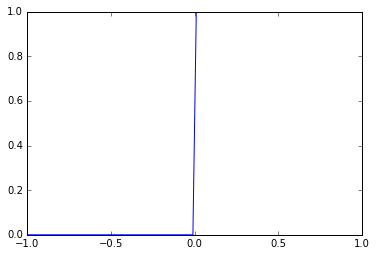

In [194]:
plt.plot(xarr,yarr)